Imports

In [76]:
import pandas as pd
import requests
import os
from pathlib import Path
import os.path
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model

In [58]:
grades_exist = os.path.exists(os.path.join(Path().resolve(), "grades.csv"))
reviews_exist = os.path.exists(os.path.join(Path().resolve(), "reviews.csv"))

In [59]:
if reviews_exist == False:
        reviews = []
        done = False
        offset = 0

        while done == False:
                r = requests.get("https://planetterp.com/api/v1/professors", params = {"offset":offset, "reviews": "true", "limit":100},)
                if r.json() == []:
                        done = True
                else:
                        reviews.append(r.json())
                        offset = offset+100
                        #print(offset)
    
#print(len(reviews))
# expect 12200

In [60]:
if reviews_exist == False:

    df = pd.DataFrame()

    count = 0

    for i in reviews:
        for j in i:
            if j.get("reviews") != []:
                for k in j.get("reviews"):
                    if k.get("course") != None and j.get("type") == "professor":
                        df.at[count, "name"] = j.get("name")
                        df.at[count, "slug"] = j.get("slug")
                        df.at[count, "type"] = j.get("type")
                        df.at[count, "course"] = k.get("course")
                        df.at[count, "rating"] = k.get("rating")
                        df.at[count, "review"] = k.get("review")
                        df.at[count, "date"] = k.get("created")[:10]
                        count = count + 1

    df = df.sort_values(by=["name","course"])
    df

In [61]:
if grades_exist == False:

    grades = []

    professors = df["name"].drop_duplicates()

    for prof in professors:
        r = requests.get("https://planetterp.com/api/v1/grades", params = {"offset":offset, "reviews": "true", "limit":100, "professor": prof})
        grades.append(r.json())
        #print(r.json())

In [62]:
if grades_exist == False:

    grade_df = pd.DataFrame()

    count = 0

    for i in grades:
        if i != []:
            for j in i:
                grade_df.at[count, "professor"] = j.get("professor")
                grade_df.at[count, "course"] = j.get("course")
                grade_df.at[count, "semester"] = j.get("semester")
                grade_df.at[count, "section"] = j.get("section")
                grade_df.at[count, "A+"] = j.get("A+")
                grade_df.at[count, "A"] = j.get("A")
                grade_df.at[count, "A-"] = j.get("A-")
                grade_df.at[count, "B+"] = j.get("B+")
                grade_df.at[count, "B"] = j.get("B")
                grade_df.at[count, "B-"] = j.get("B-")
                grade_df.at[count, "C+"] = j.get("C+")
                grade_df.at[count, "C"] = j.get("C")
                grade_df.at[count, "C-"] = j.get("C-")
                grade_df.at[count, "D+"] = j.get("D+")
                grade_df.at[count, "D"] = j.get("D")
                grade_df.at[count, "D-"] = j.get("D-")
                grade_df.at[count, "F"] = j.get("F")
                grade_df.at[count, "W"] = j.get("W")
                grade_df.at[count, "Other"] = j.get("Other")
                count = count + 1
                print(j.get("professor"))
    
    grade_df = grade_df.sort_values(by=["professor","course"])
    grade_df

In [63]:
if reviews_exist == False:
    df.to_csv("reviews.csv", encoding='utf-8', index=False)
if grades_exist == False:
    grade_df.to_csv("grades.csv", encoding = "utf-8", index = False)

In [64]:
reviews_df = pd.read_csv("reviews.csv")
reviews_df

,name,slug,type,course,rating,review,date
0,A Anthony,anthony,professor,AMST203,1.0,"By far the worst professor I’ve ever had, and ...",2018-08-17
1,A Kruglanski,kruglanski,professor,PSYC489H,2.0,"DO NOT TAKE PSYC489H ""Motivated Social Cogniti...",2015-09-07
2,A Sharma,sharma_a,professor,ASTR300,2.0,"Very boring, it's hard to maintain your focus ...",2019-04-04
3,A Sharma,sharma_a,professor,ASTR300,1.0,You'll pass but this class will be the most bo...,2019-05-26
4,A Sharma,sharma_a,professor,ASTR300,1.0,Rather difficult course. Class is extremely bo...,2019-12-08
...,...,...,...,...,...,...,...
19180,Zsuzsa Daczo,daczo,professor,SOCY105,5.0,Amazing professor. She genuinely cares about h...,2020-09-01
19181,Zsuzsa Daczo,daczo,professor,SOCY105,3.0,I had Zsuzsa for SOCY105 online. Lectures were...,2021-01-12
19182,Zsuzsa Daczo,daczo,professor,SOCY105,5.0,"Thoughtful, kind, and really funny. She talks ...",2021-01-22
19183,Zubin Jelveh,jelveh,professor,CCJS418E,1.0,Possibly the most clueless professor regarding...,2022-04-07


In [65]:
grades_df = pd.read_csv("grades.csv")
grades_df

,professor,course,semester,section,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Other
0,A Anthony,AMST202,201608,0101,1.0,2.0,1.0,2.0,5.0,1.0,2.0,3.0,5.0,0.0,0.0,0.0,2.0,4.0,0.0
1,A Anthony,AMST202,201701,0101,0.0,1.0,4.0,3.0,3.0,7.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,A Anthony,AMST203,201708,FCH1,0.0,2.0,1.0,1.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
3,A Anthony,AMST203,201708,FCH2,0.0,0.0,1.0,4.0,3.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0
4,A Anthony,AMST203,201801,0201,1.0,3.0,1.0,2.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,2.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87241,Zubin Jelveh,CCJS418E,202201,0101,22.0,4.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
87242,Zubin Jelveh,CCJS418E,202208,101,1.0,1.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
87243,Zubin Jelveh,INST414,202101,0103,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
87244,Zubin Jelveh,INST414,202108,0103,36.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,0.0


In [66]:
average_reviews_df = pd.DataFrame()
classes = {}
count = 0
curr_prof = reviews_df.at[0, "name"]
for index, row in reviews_df.iterrows():
    if reviews_df.at[index, "name"] == curr_prof:
        if reviews_df.at[index, "course"] in classes:
            classes[reviews_df.at[index, "course"]] = [classes.get(reviews_df.at[index, "course"])[0] + reviews_df.at[index, "rating"], 
                                                       classes.get(reviews_df.at[index, "course"])[1] + 1]
        else:
            classes[reviews_df.at[index, "course"]] = [reviews_df.at[index, "rating"],1]
    else:
        for i in classes.keys():
            average_reviews_df.at[count, "name"] = curr_prof
            average_reviews_df.at[count, "course"] = i
            average_reviews_df.at[count, "average_rating"] = classes.get(i)[0]/classes.get(i)[1]
            average_reviews_df.at[count, "num_ratings"] = classes.get(i)[1]
            count = count + 1
        classes = {}
        curr_prof = reviews_df.at[index, "name"]

average_reviews_df


,name,course,average_rating,num_ratings
0,A Anthony,AMST203,1.000000,1.0
1,A Sharma,ASTR300,1.750000,4.0
2,A.U. Shankar,CMSC216,2.222222,18.0
3,A.U. Shankar,CMSC412,3.200000,5.0
4,Aaron Bartlett,ENGL265,2.000000,3.0
...,...,...,...,...
4169,Zita Nunes,AASP298L,3.000000,1.0
4170,Zita Nunes,ENGL234,4.000000,2.0
4171,Zoe Copeman,ARTH201,3.600000,5.0
4172,Zohreh Davoudi,PHYS411,1.666667,3.0


In [85]:
average_grades_df = pd.DataFrame()
classes = {}
gpa = {"A+":4.0, "A":4.0, "A-":3.7,"B+":3.3, "B":3.0, "B-":2.7, "C+":2.3, "C":2.0, "C-":1.7, "D+":1.3, "D":1.0, "D-":0.7, "F":0.0}
count = 0
curr_prof = grades_df.at[0, "professor"]
for index, row in grades_df.iterrows():
    curr_gpa = [0, 0]
    for i in gpa.keys():
        curr_gpa[0] = curr_gpa[0] + gpa.get(i)*grades_df.at[index, i]
        curr_gpa[1] = curr_gpa[1] + grades_df.at[index, i]
    if grades_df.at[index, "professor"] == curr_prof:
        if grades_df.at[index, "course"] in classes:
            classes[grades_df.at[index, "course"]] = [classes.get(grades_df.at[index, "course"])[0] + curr_gpa[0], 
                                                      classes.get(grades_df.at[index, "course"])[1] + curr_gpa[1]]
        else:
            classes[grades_df.at[index, "course"]] = curr_gpa
    else:
        for i in classes.keys():
            if classes.get(i)[1] != 0:
                average_grades_df.at[count, "name"] = curr_prof
                average_grades_df.at[count, "course"] = i
                average_grades_df.at[count, "average_gpa"] = (classes.get(i)[0])/(classes.get(i)[1])
                average_grades_df.at[count, "num_students"] = classes.get(i)[1]
                count = count + 1
        classes = {}
        curr_prof = grades_df.at[index, "professor"]

average_grades_df

,name,course,average_gpa,num_students
0,A Anthony,AMST202,2.693617,47.0
1,A Anthony,AMST203,2.914130,92.0
2,A Kruglanski,PSYC489H,3.550000,8.0
3,A Kruglanski,PSYC489T,3.561702,94.0
4,A Kruglanski,PSYC604,3.544828,29.0
...,...,...,...,...
14475,Zohreh Davoudi,PHYS604,3.503636,55.0
14476,Zohreh Davoudi,PHYS624,3.565517,29.0
14477,Zsuzsa Daczo,SOCY105,3.783108,592.0
14478,Zsuzsa Daczo,SOCY227,3.698433,319.0


In [86]:
#print(average_grades_df.to_string())

                                      name    course  average_gpa  num_students
0                                A Anthony   AMST202     2.693617          47.0
1                                A Anthony   AMST203     2.914130          92.0
2                             A Kruglanski  PSYC489H     3.550000           8.0
3                             A Kruglanski  PSYC489T     3.561702          94.0
4                             A Kruglanski   PSYC604     3.544828          29.0
5                             A Kruglanski  PSYC738T     3.900000           3.0
6                             A Kruglanski   PSYC743     3.650000          10.0
7                             A Kruglanski  PSYC748M     3.614286          14.0
8                                 A Sharma   ASTR300     2.964706         221.0
9                             A.U. Shankar   CMSC216     2.357948         692.0
10                            A.U. Shankar   CMSC412     2.809319         279.0
11                            A.U. Shank

In [90]:
both_averages_df = pd.merge(
    average_reviews_df,
    average_grades_df,
    how = "inner",
    on = ["name", "course"]
)

both_averages_df

,name,course,average_rating,num_ratings,average_gpa,num_students
0,A Anthony,AMST203,1.000000,1.0,2.914130,92.0
1,A Sharma,ASTR300,1.750000,4.0,2.964706,221.0
2,A.U. Shankar,CMSC216,2.222222,18.0,2.357948,692.0
3,A.U. Shankar,CMSC412,3.200000,5.0,2.809319,279.0
4,Aaron Bartlett,ENGL265,2.000000,3.0,3.296552,29.0
...,...,...,...,...,...,...
3495,Zhi Xiang Lin,HACS200,2.500000,2.0,3.872727,33.0
3496,Zhongchi Liu,BSCI410,4.714286,7.0,3.433214,557.0
3497,Zita Nunes,ENGL234,4.000000,2.0,2.562766,94.0
3498,Zohreh Davoudi,PHYS411,1.666667,3.0,2.772093,43.0


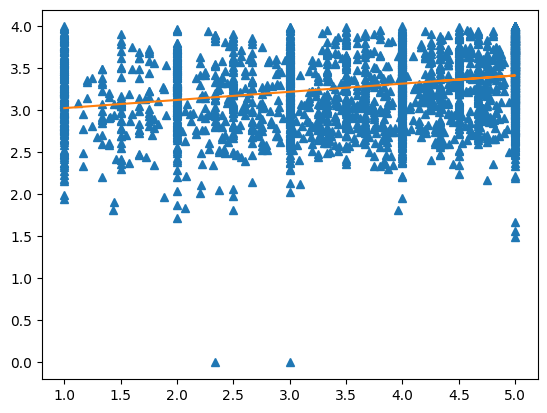

In [92]:
x = both_averages_df["average_rating"]
y = both_averages_df["average_gpa"]
reg = linear_model.LinearRegression()
x_train = [[x] for x in both_averages_df["average_rating"].values]
y_train = [[y] for y in both_averages_df["average_gpa"].values]
regfit = reg.fit(x_train, y_train)
y_pred = reg.predict(x_train)
plt.plot(x, y, "^")
plt.plot(x_train,y_pred)
plt.show()

In [93]:
# getting rid of professor/class combinations with less than 5 reviews

five_or_more_df = pd.DataFrame()
count = 0

for index, row in both_averages_df.iterrows():
    if both_averages_df.at[index, "num_ratings"] >= 5:
        five_or_more_df.loc[count] = both_averages_df.loc[index].copy()
        count = count + 1

five_or_more_df

ValueError: cannot set a frame with no defined columns

In [68]:
r = requests.get("https://planetterp.com/api/v1/grades", params = {"offset":0, "reviews": "true", "limit":100, "course":"MATH140", "professor":"Craig Schlenoff"},)
print(r.json())

[{'course': 'MATH140', 'professor': 'Craig Schlenoff', 'semester': '201708', 'section': 'FC06', 'A+': 0, 'A': 2, 'A-': 3, 'B+': 2, 'B': 7, 'B-': 5, 'C+': 3, 'C': 3, 'C-': 5, 'D+': 0, 'D': 2, 'D-': 0, 'F': 0, 'W': 1, 'Other': 0}, {'course': 'MATH140', 'professor': 'Craig Schlenoff', 'semester': '201808', 'section': 'FC06', 'A+': 2, 'A': 1, 'A-': 5, 'B+': 2, 'B': 7, 'B-': 2, 'C+': 0, 'C': 5, 'C-': 2, 'D+': 0, 'D': 2, 'D-': 0, 'F': 4, 'W': 2, 'Other': 0}, {'course': 'MATH140', 'professor': 'Craig Schlenoff', 'semester': '201908', 'section': 'FC07', 'A+': 3, 'A': 2, 'A-': 5, 'B+': 2, 'B': 2, 'B-': 1, 'C+': 1, 'C': 3, 'C-': 0, 'D+': 0, 'D': 0, 'D-': 1, 'F': 4, 'W': 4, 'Other': 0}, {'course': 'MATH140', 'professor': 'Craig Schlenoff', 'semester': '202008', 'section': 'FC07', 'A+': 1, 'A': 1, 'A-': 2, 'B+': 2, 'B': 4, 'B-': 6, 'C+': 4, 'C': 3, 'C-': 1, 'D+': 0, 'D': 2, 'D-': 1, 'F': 2, 'W': 4, 'Other': 0}, {'course': 'MATH140', 'professor': 'Craig Schlenoff', 'semester': '202008', 'section': 

In [69]:
r = requests.get("https://planetterp.com/api/v1/professors", params = {"offset":11, "reviews": "true", "limit":1},)
print(r.json())

[{'courses': ['PHYS405', 'PHYS275', 'PHYS758E', 'PHYS273', 'PHYS273H', 'PHYS273', 'PHYS273H'], 'average_rating': 4.25, 'type': 'professor', 'reviews': [{'professor': 'Abolhassan Jawahery', 'course': 'PHYS405', 'review': "Phys 405 is difficult. It just is. Now that we've gotten that out of the way...Prof. Jawahery is great in that he explains certain concepts very well. Sometimes he might nitpick (instance in a lab report or presentation), but usually it is not to be critical in the negative sense but helpful and INSTRUCTIVE.", 'rating': 4, 'expected_grade': '', 'created': '2011-12-12T20:31:00Z'}, {'professor': 'Abolhassan Jawahery', 'course': 'PHYS273', 'review': "PHYS 273 is a challenging course. It's a lot of content in a short amount of time. That being said, Prof. Jawahery tries to make the most of it and present it to his students in a comprehensible way. His content builds on itself, so if you're paying attention along the way, you'll find content later in the course quite easy t